In [1]:
# 網路上有人提到在使用pandas_datareader前加入這一行，果然可以
# ref: https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

In [2]:
# 取得公司資料
def get_companies(ex = "NASDAQ"):
    template = "http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange={}&render=download"
    url = template.format(ex)
    return pd.read_csv(url)

In [3]:
df = get_companies()

In [4]:
df.head()

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,PIH,"1347 Property Insurance Holdings, Inc.",7.050,4.219260e+07,NaN,2014.0,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pih,NaN
1,PIHPP,"1347 Property Insurance Holdings, Inc.",25.750,0.000000e+00,NaN,NaN,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pihpp,NaN
2,TURN,180 Degree Capital Corp.,2.380,7.406932e+07,NaN,NaN,Finance,Finance/Investors Services,https://www.nasdaq.com/symbol/turn,NaN
3,FLWS,"1-800 FLOWERS.COM, Inc.",12.525,8.091654e+08,NaN,1999.0,Consumer Services,Other Specialty Stores,https://www.nasdaq.com/symbol/flws,NaN
4,FCCY,1st Constitution Bancorp (NJ),21.500,1.801559e+08,NaN,NaN,Finance,Savings Institutions,https://www.nasdaq.com/symbol/fccy,NaN


In [5]:
computer_selected = df[(df['MarketCap'] > 3e8) & (df['MarketCap'] < 3.2e8)]['Symbol'].tolist()

In [6]:
len(computer_selected)

38

In [7]:
self_selected = ['GOOG', 'YHOO', 'AAPL', 'TSLA', 'MSFT']

In [8]:
candidates = computer_selected + self_selected

In [9]:
candidates = set(candidates)

In [10]:
candidates = list(candidates)

In [11]:
data = {}

for symbol in candidates:
    try:
        data[symbol] = web.DataReader(symbol, 'yahoo', datetime(2016, 1, 1))
    except Exception as e:
        print("Error accesing symbol:", symbol, "==>", e.args)

Error accesing symbol: LOOP ==> ('\nYahoo Daily has been immediately deprecated due to large breaks in the API without the\nintroduction of a stable replacement. Pull Requests to re-enable these data\nconnectors are welcome.\n\nSee https://github.com/pydata/pandas-datareader/issues\n',)
Error accesing symbol: TEDU ==> ('\nYahoo Daily has been immediately deprecated due to large breaks in the API without the\nintroduction of a stable replacement. Pull Requests to re-enable these data\nconnectors are welcome.\n\nSee https://github.com/pydata/pandas-datareader/issues\n',)
Error accesing symbol: PDFS ==> ('\nYahoo Daily has been immediately deprecated due to large breaks in the API without the\nintroduction of a stable replacement. Pull Requests to re-enable these data\nconnectors are welcome.\n\nSee https://github.com/pydata/pandas-datareader/issues\n',)
Error accesing symbol: NRIM ==> ('\nYahoo Daily has been immediately deprecated due to large breaks in the API without the\nintroduction

In [12]:
# 改個方式讀股價

import sys
sys.path.append("../modules")

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

import ffn

%matplotlib inline

from pandas import Series, DataFrame
import numpy as np

from datetime import datetime
import crawler

data = {}

for symbol in candidates:
    try:
        #data[symbol] = web.DataReader(symbol, 'yahoo', datetime(2016, 1, 1))
        data[symbol] = crawler.get_quotes(symbol, datetime(2016,1,1))
    except Exception as e:
        print("Error accesing symbol:", symbol, "==>", e.args)

Error accesing symbol: YHOO ==> ("name='B', domain=None, path=None",)


In [13]:
# 看看有幾筆資料
len(data.keys())

42

## 將股票序列化並存成檔案

In [14]:
import pickle

with open('stockdata', 'wb') as f:
    pickle.dump(data, file=f)

## 將股票資料讀回來使用看看

In [15]:
with open('stockdata', 'rb') as f:
    stocks = pickle.load(file=f)

In [16]:
stocks.keys()

dict_keys(['LOOP', 'TEDU', 'PDFS', 'NRIM', 'NHTC', 'SPOK', 'MRSN', 'BPOPN', 'FLDM', 'SMMF', 'MEIP', 'DMRC', 'OSIR', 'INBK', 'RNET', 'MGTX', 'SPKE', 'TSLA', 'AVEO', 'POPE', 'CMTA', 'MSFT', 'CDZI', 'FIXD', 'AUDC', 'PCB', 'PFM', 'KALA', 'AAPL', 'SFST', 'GAIA', 'FSNN', 'CLAR', 'GOOG', 'IRMD', 'RBNC', 'CSWC', 'SMBK', 'USLV', 'BLCM', 'EGC', 'NVTR'])

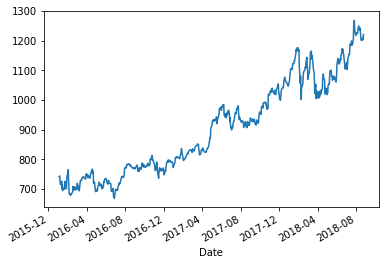

In [17]:
%matplotlib inline
stocks['GOOG']['Close'].plot()